# ATIVIDADE 1
## Para essa atividade foi escolhido uma base de dados para doenças cardíacas.

In [1]:
!pip install ucimlrepo
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

Explorando cabeçalho do dataset

In [3]:
import pandas as pd

data = pd.DataFrame(heart_disease.data.original)
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [4]:
data.shape

(303, 14)

## Através da saída do código abaixo pode-se notar que existem colunas com valores nulos, ambas de atributos numéricos, o que nos dá opções de preenchê-los ou ignorar estas instâncias.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
data['sex'].value_counts()

sex
1    206
0     97
Name: count, dtype: int64

## Como trata-se de um banco de dados de doenças cardíacas, ordenar os dados pela idade é útil.
Podemos ver no caso abaixo que não existe caso no dataset abaixo de 29 anos

In [7]:
data.sort_values(by=['age'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
132,29,1,2,130,204,0,2,202,0,0.0,1,0.0,3.0,0
225,34,0,2,118,210,0,0,192,0,0.7,1,0.0,3.0,0
101,34,1,1,118,182,0,2,174,0,0.0,1,0.0,3.0,0
117,35,0,4,138,183,0,0,182,0,1.4,1,0.0,3.0,0
138,35,1,4,120,198,0,0,130,1,1.6,2,0.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,71,0,3,110,265,1,2,130,0,0.0,1,1.0,3.0,0
42,71,0,2,160,302,0,0,162,0,0.4,1,2.0,3.0,0
233,74,0,2,120,269,0,2,121,1,0.2,1,1.0,3.0,0
257,76,0,3,140,197,0,1,116,0,1.1,2,0.0,3.0,0


In [8]:
float(data['age'].mean())

54.43894389438944

In [9]:
float(data['age'].median())

56.0

In [10]:
# variância
float(data['age'].var())

81.69741874849738

Nota-se um desvio padrão baixo no atributo idade, justamente por conta de que a maioria das pessoas que sofrem de algum problema cardíaco, estão próximas da idade média do banco de dados

In [11]:
# desvio padrão
data.std()

age          9.038662
sex          0.467299
cp           0.960126
trestbps    17.599748
chol        51.776918
fbs          0.356198
restecg      0.994971
thalach     22.875003
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           0.937438
thal         1.939706
num          1.228536
dtype: float64

Conforme os dois, nota-se um acúmulo de instâncias ao redor de 50 e 60 anos

<Axes: >

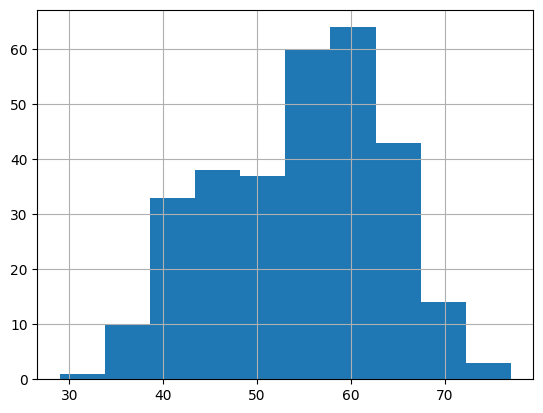

In [12]:
import matplotlib

data['age'].hist(bins=10)

<Axes: xlabel='age', ylabel='Density'>

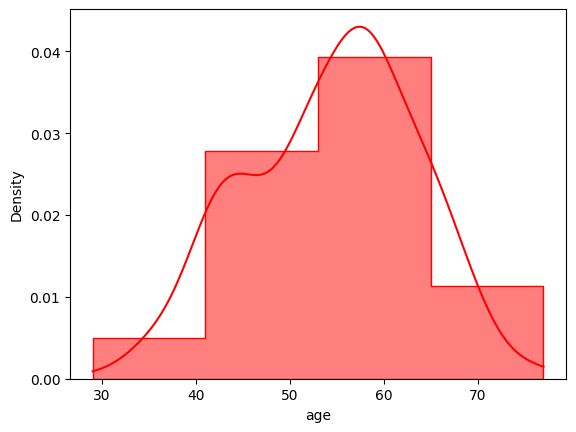

In [13]:
import seaborn as sns

sns.histplot(data['age'], bins=4, color="red", stat="density",kde=True,element="step")

<Axes: xlabel='age'>

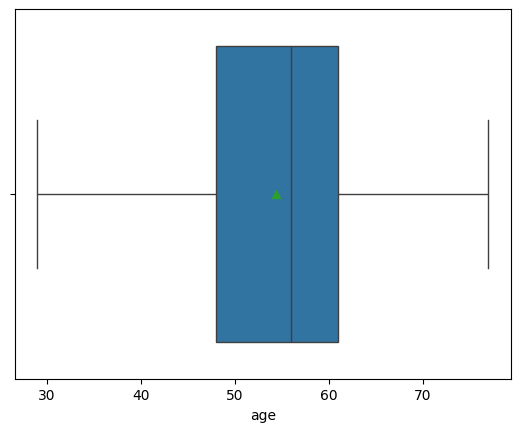

In [14]:
sns.boxplot(x='age', data=data, showmeans=True)

<Axes: xlabel='num', ylabel='age'>

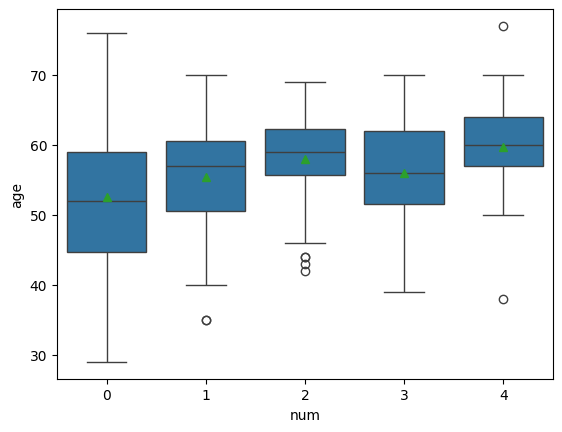

In [15]:
sns.boxplot(x='num', y='age', data=data, showmeans=True)

# Missing values
Para tratar valores, vamos entender do que se tratam os campos com valores ausentes

In [16]:
data['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

Como CA têm um range extremamente restrito e numérico, além dos dados serem desbalanceados entre si e de poucas instâncias com valores faltantes, a estratégia adotada foi adicionar o valor mais frequente a essas instâncias. 

In [20]:
from sklearn.impute import SimpleImputer
import numpy as np

dtypes = data.dtypes
columns = data.columns # Salvando as colunas da base de dados

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data = imp.fit_transform(data)
data = pd.DataFrame(data, columns=columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [21]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.504092


<Axes: >

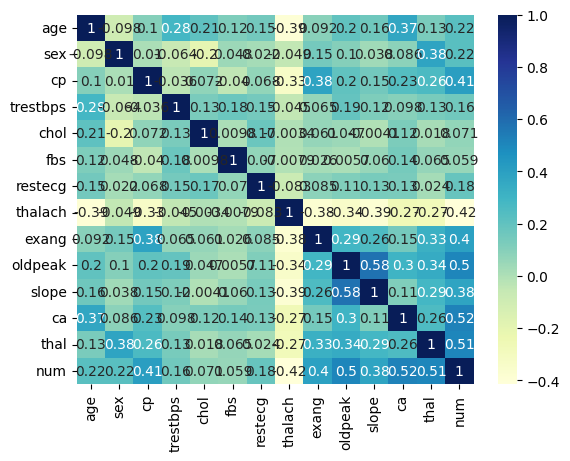

In [22]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')